# NLP and the Web

## Task 0 ~ 0P

##### a) Please enter your group number

14

_**Regarding types, documentation, and output:**_

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle. We provide type hints for the function parameters and return values of the functions that you have to implement._

_Nevertheless, your code must use the provided method stubs and parameters. Furthermore, make sure that your code runs without errors and in a reasonable amount of time, for example by using "Kernel/Restart & Run All" before submitting._

_Please use comments where appropriate to help the tutors understand your code. This is especially important for the more extensive exercises later on. Finally, please pay attention to how you output the results. We highly recommend using `display(df)` for displaying data frames._

_**Please only modify the template in the specified markdown and code cells (e.g. YOUR CODE / ANSWER / IMPORTS HERE). If you add any extra cells, they wont be taken into account while grading!  Some cells are left blank on purpose. Please do not modify these cells, because they are used to autograde your submission. If these cells are modified, the automatic grading for your submission will fail and we might deduct points. Please do not modify the cells containing public and private tests. If you want to do your own tests, please use the code cell containing your code solution (YOUR CODE HERE).**_

---

#  Home Exercise 5

# Imports

In [42]:
import numpy as np
from typing import Tuple, List
import numpy.typing as npt
import matplotlib.pyplot as plt

## Task 1: Neural Network from scratch ~ 10P

**a) What is a Perceptron and what are the tasks of the 5 different components? (1P)**

A Perceptron is a simple single layer neural netwoork that can be used for classification. It can be used for more complex neural networks.

1.) Inputs: As inputs we use features of the data points we want to classify. 
2.) Weights and Biases: The weights are used to multiply the inputs with. They are used to adjust the importance of the inputs by scaling them. The bias is used to adjust the output of the perceptron. It is added to the weighted sum of the inputs.
3.) Weighted Sum: The weighted sum is the sum of the inputs multiplied with the weights. It is used as input for the activation function.
4.) Activation Function: The activation function is normally used to map the weighted sum to a value between 0 and 1. In the case of the perceptron a step function is used, resulting in either 0 or 1 as output.
5.) Output: The output is the result of the activation function. It is used to classify the data point.


**b) Which activation functions do you know besides the ReLU (name at least 3) and explain the inputs / outputs of one of those? (1.5P)**

1.) Tanh: The tanh function is a sigmoid function. It maps the input to a value between -1 and 1. It is used to normalize the data. The output is 0 for an input of 0. The output is 1 for a large positive input and -1 for a large negative input.
2.) Sigmoind: The sigmoid function maps the input to a value between 0 and 1. It is used to normalize the data. The output is 0.5 for an input of 0. The output is 1 for a large positive input and 0 for a large negative input.
3.) Softmax: The softmax function maps the input to a value between 0 and 1. It is used to normalize the data. The output is 0 for an input of 0. The output is 1 for a large positive input and 0 for a large negative input.

**c) Implement the ReLU activation function and its derivative. (2P)**

*Note:* The ReLU (Rectified Linear Unit) function is a piecewise linear function which is very similar to the linear activation function that you know from lecture 2 page 30. The difference between these two is that ReLU cuts of the negative value and sets them to zero. $$\text{ReLU}(x) = \begin{cases} x, & \text{if } x > 0 \\ 0, & \text{if } x \le 0 \end{cases} $$

In [43]:
def relu(z: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    Input: 
        z: floating point vector to which you want to apply the ReLU activation function

    Output:
        Output a floating point vector that has the same shape as z but with the activated values
    '''
    return np.maximum(z, 0)

In [44]:
relu(np.array([1,-1]))

array([1, 0])

In [45]:
# These are some test cases for you to check your implementation
assert((relu(np.array([1,-1])) == np.array([1,0])).all())
assert((relu(np.array([-112,234])) == np.array([0,234])).all())

In [46]:
def grad_relu(z: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    Input: 
        z: Vector to which you want to apply the gradient of the ReLU activation function

    Output:
        Output a vector that has the same shape as z and is the derivative of z
    '''
    return np.where(z > 0, 1, 0)

In [47]:
# These are some test cases for you to check your implementation
assert((grad_relu(np.array([1,-1])) == np.array([1,0])).all())
assert((grad_relu(np.array([-112,234])) == np.array([0,1])).all())

**d) Implement the forward function and the cost function and its gradient (2.5P).**

Implement the forward function for a neural network with one hidden layer.

*Hint:* You only need to use the activation function in the hidden layer.

In [48]:
def forward(X: npt.NDArray[np.float64], 
            Wh: npt.NDArray[np.float64], 
            Bh: npt.NDArray[np.float64], 
            Wo: npt.NDArray[np.float64], 
            Bo: npt.NDArray[np.float64]) -> Tuple[npt.NDArray[np.float64], 
                                                  npt.NDArray[np.float64], 
                                                  npt.NDArray[np.float64]]:
    ''' 
    This is the forward function for making predictions. 
    In order to train the network later you also need to return the activation and pre-activation of the hidden layer.
    
    Input:
        X: This is equivalent to the x in f(x). So to this value we want a prediction, Dimension: Scalar
        Wh: weight matrix or vector for the hidden layer, Dimension: inputLayerSize x hiddenLayerSize
        Bh: bias for the hidden layer, Dimension: 1 x hiddenLayerSize
        Wo: weight matrix for the output layer, Dimension: hiddenLayerSize x ouputLayerSize
        Bo: bias for the output layer, Dimension: 1 x ouputLayerSize

    Output:
        1. Prediction, Dimension: Scalar
        2. Activation of the hidden layer, Dimension: 1 x hiddenLayerSize
        3. Pre-activation of the hidden layer, Dimension: 1 x hiddenLayerSize
    '''
    Zh = np.dot(X, Wh) + Bh
    Ah = relu(Zh)
    Zo = np.dot(Ah, Wo) + Bo
    return Zo, Ah, Zh
    

In [49]:
# Test - Don't modify

The cost function (also known as *loss*) is given as follows: $$\begin{align*} X &:= \text{Input for forward function}\\ y &:= \text{Correct label for } X \\ \text{forward}(X) &:= \text{Forward function that predicts a label for input } X\\ \text{The cost function:}\\ \text{cost}(X,y) &= \frac{\sum (\text{forward}(X)-y)^2}{2} \end{align*} $$

This is a slight variation of the one you already learned in the lecture but will do just fine.

In [50]:
def cost(X: npt.NDArray[np.float64], y: np.float64,
            Wh: npt.NDArray[np.float64], 
            Bh: npt.NDArray[np.float64], 
            Wo: npt.NDArray[np.float64], 
            Bo: npt.NDArray[np.float64]) -> np.float64:
    ''' 
    Quadratic loss function.
    
    Dimensions are similar to forward function.

    Input:
        X: Input for the value to predict
        y: real value for the prediction, Dimension: Scalar
        Wh: weight matrix or vector for the hidden layer
        Bh: bias for the hidden layer
        Wo: weight matrix for the output layer
        Bo: bias for the output layer

    Output:
        cost, Dimension: Scalar
    '''
    
    Zo, _, _ = forward(X, Wh, Bh, Wo, Bo)
    cost = np.sum((Zo - y)**2)/2
    return cost

In [51]:
# Test - Don't modify


In [52]:
def cost_grad(output: np.float64, y: np.float64) -> np.float64:
    ''' 
    Gradient of Quadratic loss function

    Input:
        output: predicted value
        y: real value for the output

    Output:
        gradient of cost
    '''
    grad = output - y
    return grad

In [53]:
# Test - Don't modify


Make yourself a clear image of what gradients are required and how they are calculated. We implemented the `backprop` function already for you.

In [54]:
def backprop(X: npt.NDArray[np.float64],
             output: npt.NDArray[np.float64],
             y: npt.NDArray[np.float64],
             Ah: npt.NDArray[np.float64],
             Zh: npt.NDArray[np.float64],
             Wo: npt.NDArray[np.float64]) -> Tuple[npt.NDArray[np.float64], 
                                                   npt.NDArray[np.float64], 
                                                   npt.NDArray[np.float64], 
                                                   npt.NDArray[np.float64]]:

    '''
    The backprop function should output the gradients to all the necessary vectors. 
     
    Input:
        X: This is equivalent to the x in f(x). So to this value we want a prediction
        output: Predicted value
        y: true value to X
        Ah: activation of hidden layer
        Zh: pre-activation of hidden layer
        Wo: weights of output layer

    Output:
        1. Gradients of weights of hidden layer
        2. Gradients of weights of output layer 
        3. Gradients of bias of hidden layer
        4. Gradients of bias of output layer
    '''
    err_output: np.float64 = cost_grad(output, y) #last layer is linear, no gradient needed
    err_hidden: npt.NDArray[np.float64] = np.dot(err_output, Wo.T) * grad_relu(Zh)

    # Weight Gradients
    dCdWh: npt.NDArray[np.float64] = np.dot(X, err_hidden)
    dCdWo: npt.NDArray[np.float64] = np.dot(Ah.T, err_output)
    
    # Bias Gradients
    dCdBh: npt.NDArray[np.float64] = np.sum(err_hidden, axis=0, keepdims=True)
    dCdBo: npt.NDArray[np.float64] = np.sum(err_output, axis=0, keepdims=True)

    return dCdWh, dCdWo, dCdBh, dCdBo

**e) Implement the training loop and train a simple function in the from of $f(x) = ax² + bx + c$ for example $f(x) = (x-5)^2$. But feel free to experiment and maybe try higher order functions too.**

For that you have to implement *gradient descent* to update the weights and performs one epoch of the training cycle and after that the training loop. (3P)

In [55]:
def gradient_descent(x: List[float], 
                     y: List[float],
                     lr: float, 
                     Wh: npt.NDArray[np.float64], 
                     Wo: npt.NDArray[np.float64], 
                     Bh: npt.NDArray[np.float64], 
                     Bo: npt.NDArray[np.float64]) -> Tuple[float, 
                                                           npt.NDArray[np.float64], 
                                                           npt.NDArray[np.float64], 
                                                           npt.NDArray[np.float64], 
                                                           npt.NDArray[np.float64]]:
    ''' 
    Gradient descent gets a list of inputs and true outputs and iterates trough 
    them and performs a weight and bias update each step. 
    
    Dimensions of the varables are similar to task 1 d)

    Input:
        x: list of inputs in the same ordering as y
        y: list of true outputs with the same ordering as x
        lr: learning rate of gradient descent
        Wh: weight matrix or vector for the hidden layer
        Bh: bias for the hidden layer
        Wo: weight matrix for the output layer
        Bo: bias for the output layer
    
    Output:
        1. average of cost function of input data (TODO: check formulation)
        2. updated weights of hidden layer
        3. updated weights of output layer
        4. updated bias of hidden layer
        5. updated bias of output layer
    '''
    costs: float = 0.0
    
    for i in range(len(x)):
        X = x[i]
        Y = y[i]
        Zo, Ah, Zh = forward(X, Wh, Bh, Wo, Bo)
        dCdWh, dCdWo, dCdBh, dCdBo = backprop(X, Zo, Y, Ah, Zh, Wo)
        Wh -= lr * dCdWh
        Wo -= lr * dCdWo
        Bh -= lr * dCdBh
        Bo -= lr * dCdBo
        costs += cost(X, Y, Wh, Bh, Wo, Bo)
    costs /= len(x)
    return costs, Wh, Wo, Bh, Bo

In [56]:
### Tests to check your implementation
inputLayerSize_t = 1
hiddenLayerSize_t = 5 # This is the value you can play around with
outputLayerSize_t = 1 

# Initialize Weights
Wh_t = np.ones((inputLayerSize_t, hiddenLayerSize_t)) 
Wo_t = np.ones((hiddenLayerSize_t, outputLayerSize_t))

# Initialize Biases
# Small positive value to avoid Relu units dying too quickly
Bh_t = np.full((1, hiddenLayerSize_t), 0.2)
Bo_t = np.full((1, outputLayerSize_t), 0.2)

# gradient_descent([1,2],[3,4], 0.001, Wh_t, Wo_t, Bh_t, Bo_t)

# Forward inputs and outputs
## Test 1
x_1 = [1,2,3]
y_1 = [3,2,1]
Wh_1 = Wh_t
Wo_1 = Wo_t
Bh_1 = Bh_t
Bo_1 = Bo_t

tmp_1 = gradient_descent(x_1,y_1, 0.001, Wh_1, Wo_1, Bh_1, Bo_1)

# for i in range(5):
#     print(np.round(tmp_1[i], 2))

assert(np.round(tmp_1[0], 2) == np.round(42.57, 2))
assert((np.round(tmp_1[1], 2) == np.round(np.array([[0.94, 0.94, 0.94, 0.94, 0.94]]), 2)).all())
assert((np.round(tmp_1[2], 2) == np.round(np.array([[0.93], [0.93], [0.93], [0.93], [0.93]]), 2)).all())
assert((np.round(tmp_1[3], 2) == np.round(np.array([[0.17, 0.17, 0.17, 0.17, 0.17]]), 2)).all())
assert((np.round(tmp_1[4], 2) == np.round(np.array([[0.17]]), 2)).all())

In [57]:
# Test - Don't modify


The following is the initialization of the weights and biases. So you get consistent results. Feel free to experiment with the number of neurons in the hidden layer. 

In [58]:
def init_network() -> Tuple[npt.NDArray[np.float64], npt.NDArray[np.float64], npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    inputLayerSize: int = 1
    hiddenLayerSize: int = 10 # This is the value you can play around with
    outputLayerSize: int = 1 

    # Initialize Weights
    np.random.seed(0)
    Wh: npt.NDArray = np.random.randn(inputLayerSize, hiddenLayerSize) /np.sqrt(inputLayerSize)
    Wo: npt.NDArray = np.random.randn(hiddenLayerSize, outputLayerSize) /np.sqrt(hiddenLayerSize)

    # Initialize Biases
    # Small positive value to avoid Relu units dying too quickly
    Bh: npt.NDArray = np.full((1, hiddenLayerSize), 0.2)
    Bo: npt.NDArray = np.full((1, outputLayerSize), 0.2)

    return Wh, Wo, Bh, Bo

Next is the generation of the training data. Here you can also change up the function which the network should learn or the interval in which the numbers are generated. 

*Hint:* Start with an easy function an later aim for something more difficult.

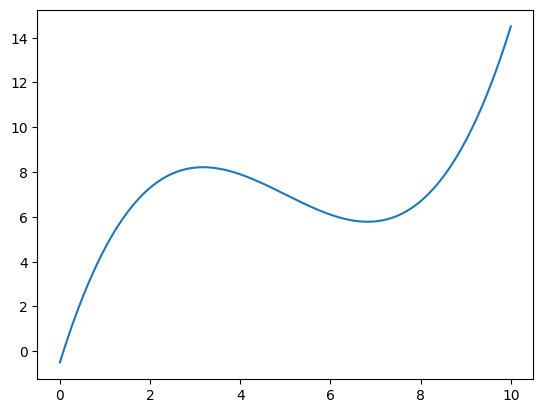

In [59]:
def f_x(x: float) -> float:
    '''
    Feel free to play around!
    '''
    return 0.1 * ((x-5)**3 - 10 * x + 120) # Example of a more complex function
    # return (x-5)**2

x = np.linspace(0, 10, 1001)
y = np.array([ f_x(i)  for i in x])

plt.plot(x,y)

Now implement the training loop and train your network for 1000 epochs with a learning rate of 0.001. Shuffle the training data before each epoch.

*Note:* The cost should go down if that is not the case check your code above. Are the derivatives correct?

**At the end the cost for $f(x) = (x-5)^2$ has to be below 0.05!**

Epoch 0, Cost: 2.025517922699766
Epoch 100, Cost: 0.03552203626523411
Epoch 200, Cost: 0.025638109048103024
Epoch 300, Cost: 0.01484615011437065
Epoch 400, Cost: 0.012536122549724023
Epoch 500, Cost: 0.011355691748202057
Epoch 600, Cost: 0.010228962285557511
Epoch 700, Cost: 0.010122116688320887
Epoch 800, Cost: 0.009366821475278972
Epoch 900, Cost: 0.009293618758571527


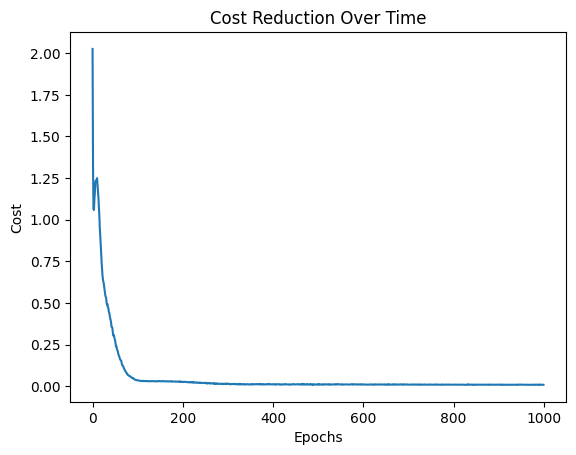

Training successful, final cost is below 0.05


In [60]:
Wh, Wo, Bh, Bo = init_network()

# Training parameters
epochs = 1000
lr = 0.001

costs = []

for epoch in range(epochs):
    p = np.random.permutation(len(x))
    x_shuffled, y_shuffled = x[p], y[p]
    x_list, y_list = x_shuffled.tolist(), y_shuffled.tolist()

    epoch_cost, Wh, Wo, Bh, Bo = gradient_descent(x_list, y_list, lr, Wh, Wo, Bh, Bo)
    costs.append(epoch_cost)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {epoch_cost}")

# Plotting the cost over epochs
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Time')
plt.show()

# Check final cost for the specific function f(x) = (x-5)^2
if costs[-1] < 0.05:
    print("Training successful, final cost is below 0.05")
else:
    print("Training might not be successful, final cost is above 0.05")

In [61]:
# Test - Don't modify


Normally you also need test data in order to validate the accuracy of you network. But for now we only plot the predictions and the real values in the same plot so we can compare it.

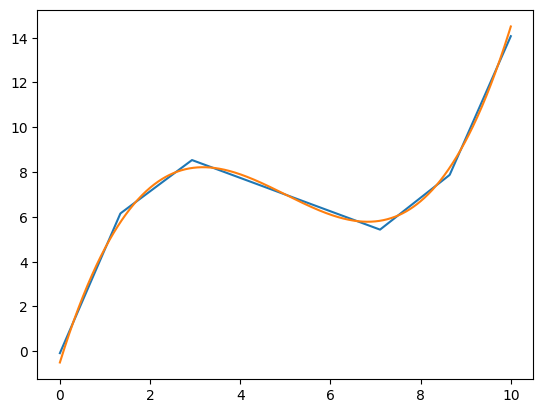

In [62]:
x_ax = np.linspace(0, 10, 1001)
y = np.array([ f_x(i)  for i in x_ax])
preds = np.array([forward(i, Wh, Bh, Wo, Bo)[0][0,0] for i in x_ax])
plt.plot(x_ax, preds)
plt.plot(x_ax,y)

## Task 2 - Byte Pair Encoding ~ 10P

The goal is to calculate byte pair encodings for a given dataset. For a recap of the concept we refer to lecture 9, slides 66.ff.

But first we need to install some additional libraries in order to get it working properly:

In [63]:
!pip install datasets==2.16.1
!pip install tokenizers==0.15.0

In [64]:
from tokenizers.pre_tokenizers import Whitespace
from datasets import load_dataset
from datasets.arrow_dataset import Dataset
from collections import defaultdict

**a)** First we want to make sure we create a suffieciently large corpus. As dataset you import the dataset "wikitext-2-raw-v1" from huggingface. Make sure to use the 500 first entries of the training dataset and subsequently filter out empty lines. 

Save the dataset in the variable `dataset` and the corpus in the variable `corpus`. ***(1P)***

In [65]:
# Load WikiText-2 dataset "wikitext-2-raw-v1"

dataset : Dataset = None
corpus: list = None

# YOUR CODE HERE
#raise NotImplementedError()
#load dataset from huginface wikitext
raw_dataset = load_dataset(path="wikitext", name="wikitext-2-raw-v1", split="train")
#convert to pandas
dataset = raw_dataset.to_pandas()
#fiter out empty lines
dataset.replace('', np.nan, inplace=True)
dataset.dropna(inplace=True)
#only select first 500 entries
dataset = dataset.iloc[:500]

#create corpus as list, as a loop because tolist craetes sublists
corpus = []
#print(dataset.values)
for value in dataset.values:
    corpus.append(value[0])
print(corpus)


#print(len(dataset))
#print(dataset)

[' = Valkyria Chronicles III = \n', ' Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n', " The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving for

In [66]:
# Test - Don't modify


In [67]:
# Test - Don't modify


In [68]:
# Test - Don't modify


In [69]:
# Test - Don't modify


Note that the corpus should have a format like:

```python
corpus = [
    "This is the first line",
    "This is the second line",
    ..
]
``` 

For debugging during coding you can also consider working with a smaller corpus, e.g. only 5 lines.

**b)** Here, you loop through the corpus and count the word frequencies and save the output in the variable `word_freqs`. 

The `Whitespace` pre_tokenizer can be used for preprocessing a string to strip away empty spaces as well as to separate out special characters such as punctuations. 

*Hint:* You may want to have a look at the function: `pre_tokenize_str` of the `Whitespace` pre_tokenizer. This might help you. ***(2P)***

In [70]:
# Initialize a Whitespace pre_tokenizer from the tokenizers library
# Helps in separating text about white space and punctuations
tokenizer = Whitespace()

# Initialize a defaultdict to store word frequencies
word_freqs = defaultdict(int)
# this dictionary gets entries for word_freqs[word]

# This will be needed later
vocab_size:int = 200

def count_word_freqs(corpus:list) -> dict:
    # We loop through to corups to calculate word frequencies
    # YOUR CODE HERE
    #raise NotImplementedError()
    for entry in corpus:
        tokenzized_entry = tokenizer.pre_tokenize_str(entry)
        for token in tokenzized_entry:
            word = token[0]
            if word in word_freqs.keys():
                word_freqs[word] += 1
            else: word_freqs[word] = 1
    return word_freqs

word_freqs = count_word_freqs(corpus)
print(word_freqs)

defaultdict(<class 'int'>, {'=': 552, 'Valkyria': 54, 'Chronicles': 39, 'III': 17, 'Senjō': 5, 'no': 24, '3': 33, ':': 66, 'Unrecorded': 1, '(': 185, 'Japanese': 6, '戦場のヴァルキュリア3': 3, ',': 1945, 'lit': 4, '.': 1598, 'of': 1117, 'the': 2298, 'Battlefield': 4, ')': 186, 'commonly': 2, 'referred': 4, 'to': 766, 'as': 262, 'outside': 12, 'Japan': 4, 'is': 141, 'a': 641, 'tactical': 3, 'role': 22, '@-@': 326, 'playing': 8, 'video': 9, 'game': 84, 'developed': 9, 'by': 200, 'Sega': 5, 'and': 988, 'Media': 4, 'Vision': 5, 'for': 305, 'PlayStation': 9, 'Portable': 3, 'Released': 2, 'in': 778, 'January': 11, '2011': 22, 'it': 87, 'third': 17, 'series': 21, 'Employing': 1, 'same': 29, 'fusion': 1, 'real': 8, 'time': 58, 'gameplay': 10, 'its': 56, 'predecessors': 4, 'story': 14, 'runs': 1, 'parallel': 1, 'first': 69, 'follows': 2, '"': 337, 'Nameless': 12, 'penal': 2, 'military': 14, 'unit': 7, 'serving': 4, 'nation': 7, 'Gallia': 5, 'during': 44, 'Second': 6, 'Europan': 2, 'War': 11, 'who': 76, '

In [71]:
# Test - Don't modify
assert len(word_freqs.keys()) == 6911
assert sum(word_freqs.values()) == 40051


The following block creates the alphabet and initial vocabulary

In [72]:
def initialize(word_freqs:dict) -> Tuple[list, list, dict, dict]:
    alphabet:list = []
    vocab:list = [""]
    splits:dict = {}
    merges:dict = {}
    
    for word in word_freqs.keys():
        for letter in word:
            if letter not in alphabet:
                alphabet.append(letter)
    alphabet.sort()

    vocab = alphabet.copy()
    splits = {word: [c for c in word] for word in word_freqs.keys()}

    return alphabet, vocab, splits, {}

alphabet, vocab, splits, merges = initialize(word_freqs)

**c)** Define a function to compute the frequency of each pair of characters ***(2P)***

In [73]:
def calc_pair_freqs(splits:dict) -> dict:
    pair_freqs = defaultdict(int)
    # to compute the frequency of each pair of characters
    # YOUR CODE HERE
    #raise NotImplementedError()


    for word,split in splits.items():
        number = word_freqs[word]
        #segement that string into chunks of pairs
        chunks = []

        #for i in range(len(word)-1):
            #for item in vocab:
                #if word[i:i+len(item)+1] == item:
                    #chunks.append(word[i:i+len(item)+1])
                    #break
                #else:
                    #chunks.append(word[i:i+2])
                    #break

        for i in range(len(split)-1):
            
            chunks.append(''.join(split[i:i+2]))


        #count the chunks, take into account that a word might occur multiple times
        for pair in chunks:
            if pair in pair_freqs.keys():
                pair_freqs[pair] += 1 * number
            else: pair_freqs[pair] = number

            
    return pair_freqs

# Initialize pair_freqs by calling the calc_pair_freqs function
pair_freqs = calc_pair_freqs(splits)
print(pair_freqs)


#TO DEBUG
#print(len(pair_freqs.keys()))
#print(sum(pair_freqs.values()))


defaultdict(<class 'int'>, {'Va': 83, 'al': 1364, 'lk': 70, 'ky': 72, 'yr': 67, 'ri': 943, 'ia': 501, 'Ch': 116, 'hr': 182, 'ro': 896, 'on': 2001, 'ni': 478, 'ic': 749, 'cl': 202, 'le': 1062, 'es': 1705, 'II': 66, 'Se': 63, 'en': 1544, 'nj': 30, 'jō': 5, 'no': 332, 'Un': 49, 'nr': 12, 're': 2180, 'ec': 494, 'co': 800, 'or': 1763, 'rd': 288, 'de': 1133, 'ed': 1966, 'Ja': 99, 'ap': 237, 'pa': 300, 'an': 2590, 'ne': 804, 'se': 1100, '戦場': 4, '場の': 4, 'のヴ': 4, 'ヴァ': 4, 'ァル': 4, 'ルキ': 4, 'キュ': 4, 'ュリ': 4, 'リア': 4, 'ア3': 3, 'li': 682, 'it': 1405, 'of': 1233, 'th': 4177, 'he': 4042, 'Ba': 97, 'at': 1590, 'tt': 268, 'tl': 198, 'ef': 174, 'fi': 336, 'ie': 609, 'el': 647, 'ld': 341, 'om': 660, 'mm': 131, 'mo': 399, 'nl': 68, 'ly': 468, 'fe': 283, 'er': 2809, 'rr': 143, 'to': 1228, 'as': 1343, 'ou': 789, 'ut': 375, 'ts': 443, 'si': 607, 'id': 265, 'is': 1062, 'ta': 599, 'ac': 623, 'ct': 482, 'ti': 1610, 'ca': 482, 'ol': 398, '@-': 326, '-@': 326, 'pl': 358, 'la': 731, 'ay': 368, 'yi': 46, 'in': 3

In [74]:
# Test - Don't modify
assert len(pair_freqs.keys()) == 969
assert sum(pair_freqs.values()) == 130300


Here we find the pair of characters that appears most frequently together

In [75]:
for i, key in enumerate(pair_freqs.keys()):
    print(f"{key}: {pair_freqs[key]}")
    if i >= 5:
        break

best_pair = ""
max_freq = None

for pair, freq in pair_freqs.items():
    if max_freq is None or max_freq < freq:
        best_pair = pair
        max_freq = freq

print(best_pair, max_freq)

Va: 83
al: 1364
lk: 70
ky: 72
yr: 67
ri: 943
th 4177


**d)** Define a function to merge the most frequent pair of characters ***(2P)***

In [76]:
def combine_pair(a:str, b:str, splits:dict, word_freqs:dict) -> dict:
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue

        # YOUR CODE HERE
        #raise NotImplementedError()
        if a+b in word:
            for i in range(len(split)-2):
                char = split[i]
                if char == a and split[i+1] == b:
                    split[i] = ''.join([a,b])
                    del split[i+1]
            
            break

    return splits


In [77]:
# Test - Don't modify
# Example and sanity check
splits_example = combine_pair("y", "r", splits, word_freqs)
assert splits_example["Valkyria"] == ['V', 'a', 'l', 'k', 'yr', 'i', 'a']


**e)** Create the vocabulary by computing the pair frequencies and merging them accordingly, until you have a vocabulary size of 200 like it is done in the lecture notes of lecture 9. ***(2P)***

In [78]:
# YOUR CODE HERE
#raise NotImplementedError()

def create_vocab(word_freqs, vocab_size):
    #initilize the basic alphabet
    alphabet, vocabulary, voc_splits, merges = initialize(word_freqs)
   
    while len(vocabulary) < vocab_size:
        best_pair = ""
        max_freq = None
        #compute pair frequency
        pair_freq_dict = calc_pair_freqs(voc_splits)

        #find the most frequent pair in the results, don't consider pairs that have been added to the vocabulary already 
        for pair, freq in pair_freq_dict.items():
            if max_freq is None or max_freq < freq and pair not in vocabulary:
                best_pair = pair
                max_freq = freq

        #combine the pair in the splits
        if len(best_pair) == 2:
            voc_splits = combine_pair(best_pair[0], best_pair[1], voc_splits, word_freqs)
        else:
            #ugly brute-force method to try and work out which part of the pair is a and b if the pair is longer than 2
            if best_pair[0:len(best_pair)-2] in vocabulary:
                part_a = best_pair[0:len(best_pair)-2]
                part_b = best_pair[len(best_pair)-2:]

            voc_splits = combine_pair(part_a, part_b, voc_splits, word_freqs)
            
        #add the pair to the vocabulary
        vocabulary.append(best_pair)

    return alphabet, vocabulary, voc_splits, merges

vocab = None
alphabet, vocab, voc_splits, merges = create_vocab(word_freqs, 200)
print(len(vocab))
print(vocab)
    

200
['!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~', '£', '°', '²', 'Æ', 'á', 'é', 'Ō', 'ō', 'Š', 'ū', 'ḏ', 'ṯ', '–', '—', '’', '“', '”', '†', '‡', '₤', '₹', 'い', 'う', 'か', 'が', 'き', 'く', 'し', 'た', 'つ', 'な', 'の', 'め', 'も', 'ら', 'ァ', 'ア', 'キ', 'ュ', 'リ', 'ル', 'ヴ', '乙', '光', '名', '君', '命', '咲', '場', '女', '戦', '灯', '瘡', '花', '誓', '誰', '赤', '運', '銃', '願', '３', '�', 'th', 'in', 'er', 'an', 'the', 're', 'on', 'ed', 'or', 'he', 'es', 'nd', 'te', 'ti', 'at', 'en', 'ar', 'it', 'al', 'as', 'ng', 'of', 'to', 'st', 'de', 'se', 'nt', 'le', 'is', 'me', 'ri', 'ea', 'ha', 'ra', 'io', 've', 'ro', 'hi', 'co', 'ne', 'ou', 'ic', 'la', 'ma', 'li',

In [79]:
# Test - Don't modify
assert len(vocab) == 200


We provide the tokenize function to you

In [80]:
def text_splitting(text:str, merges:dict, splits:dict) -> list:
    tokens = tokenizer.pre_tokenize_str(text)
    tokens_text = [word for word, _ in tokens]
    splits = [[l for l in word] for word in tokens_text]
    for pair, merge in merges.items():
        for ind, split in enumerate(splits):
            i = 0
            while i < len(split) - 1:
                if split[i] == pair[0] and split[i + 1] == pair[1]:
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            splits[ind] = split

    return sum(splits, [])

alphabet, vocab, splits, merges = create_vocab(word_freqs, vocab_size)
text_splitting("Darmstadt holds the official title City of Science (German: Wissenschaftsstadt) as it is a major centre of scientific institutions, universities, and high-technology companies.", merges, splits)

['D',
 'a',
 'r',
 'm',
 's',
 't',
 'a',
 'd',
 't',
 'h',
 'o',
 'l',
 'd',
 's',
 't',
 'h',
 'e',
 'o',
 'f',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 't',
 'i',
 't',
 'l',
 'e',
 'C',
 'i',
 't',
 'y',
 'o',
 'f',
 'S',
 'c',
 'i',
 'e',
 'n',
 'c',
 'e',
 '(',
 'G',
 'e',
 'r',
 'm',
 'a',
 'n',
 ':',
 'W',
 'i',
 's',
 's',
 'e',
 'n',
 's',
 'c',
 'h',
 'a',
 'f',
 't',
 's',
 's',
 't',
 'a',
 'd',
 't',
 ')',
 'a',
 's',
 'i',
 't',
 'i',
 's',
 'a',
 'm',
 'a',
 'j',
 'o',
 'r',
 'c',
 'e',
 'n',
 't',
 'r',
 'e',
 'o',
 'f',
 's',
 'c',
 'i',
 'e',
 'n',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'n',
 's',
 't',
 'i',
 't',
 'u',
 't',
 'i',
 'o',
 'n',
 's',
 ',',
 'u',
 'n',
 'i',
 'v',
 'e',
 'r',
 's',
 'i',
 't',
 'i',
 'e',
 's',
 ',',
 'a',
 'n',
 'd',
 'h',
 'i',
 'g',
 'h',
 '-',
 't',
 'e',
 'c',
 'h',
 'n',
 'o',
 'l',
 'o',
 'g',
 'y',
 'c',
 'o',
 'm',
 'p',
 'a',
 'n',
 'i',
 'e',
 's',
 '.']

**f)** Now, repeat the byte pair encoding for vocab sizes of 1000 and 5000. What do you notice? ***(1P)***

In [81]:
alphabet, vocab, splits, merges = create_vocab(word_freqs, 1000)
text_splitting("Darmstadt holds the official title City of Science (German: Wissenschaftsstadt) as it is a major centre of scientific institutions, universities, and high-technology companies.", merges, splits)

['D',
 'a',
 'r',
 'm',
 's',
 't',
 'a',
 'd',
 't',
 'h',
 'o',
 'l',
 'd',
 's',
 't',
 'h',
 'e',
 'o',
 'f',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 't',
 'i',
 't',
 'l',
 'e',
 'C',
 'i',
 't',
 'y',
 'o',
 'f',
 'S',
 'c',
 'i',
 'e',
 'n',
 'c',
 'e',
 '(',
 'G',
 'e',
 'r',
 'm',
 'a',
 'n',
 ':',
 'W',
 'i',
 's',
 's',
 'e',
 'n',
 's',
 'c',
 'h',
 'a',
 'f',
 't',
 's',
 's',
 't',
 'a',
 'd',
 't',
 ')',
 'a',
 's',
 'i',
 't',
 'i',
 's',
 'a',
 'm',
 'a',
 'j',
 'o',
 'r',
 'c',
 'e',
 'n',
 't',
 'r',
 'e',
 'o',
 'f',
 's',
 'c',
 'i',
 'e',
 'n',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'n',
 's',
 't',
 'i',
 't',
 'u',
 't',
 'i',
 'o',
 'n',
 's',
 ',',
 'u',
 'n',
 'i',
 'v',
 'e',
 'r',
 's',
 'i',
 't',
 'i',
 'e',
 's',
 ',',
 'a',
 'n',
 'd',
 'h',
 'i',
 'g',
 'h',
 '-',
 't',
 'e',
 'c',
 'h',
 'n',
 'o',
 'l',
 'o',
 'g',
 'y',
 'c',
 'o',
 'm',
 'p',
 'a',
 'n',
 'i',
 'e',
 's',
 '.']

In [82]:
alphabet, vocab, splits, merges = create_vocab(word_freqs, 5000)
text_splitting("Darmstadt holds the official title City of Science (German: Wissenschaftsstadt) as it is a major centre of scientific institutions, universities, and high-technology companies.", merges, splits)

['D',
 'a',
 'r',
 'm',
 's',
 't',
 'a',
 'd',
 't',
 'h',
 'o',
 'l',
 'd',
 's',
 't',
 'h',
 'e',
 'o',
 'f',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 't',
 'i',
 't',
 'l',
 'e',
 'C',
 'i',
 't',
 'y',
 'o',
 'f',
 'S',
 'c',
 'i',
 'e',
 'n',
 'c',
 'e',
 '(',
 'G',
 'e',
 'r',
 'm',
 'a',
 'n',
 ':',
 'W',
 'i',
 's',
 's',
 'e',
 'n',
 's',
 'c',
 'h',
 'a',
 'f',
 't',
 's',
 's',
 't',
 'a',
 'd',
 't',
 ')',
 'a',
 's',
 'i',
 't',
 'i',
 's',
 'a',
 'm',
 'a',
 'j',
 'o',
 'r',
 'c',
 'e',
 'n',
 't',
 'r',
 'e',
 'o',
 'f',
 's',
 'c',
 'i',
 'e',
 'n',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'n',
 's',
 't',
 'i',
 't',
 'u',
 't',
 'i',
 'o',
 'n',
 's',
 ',',
 'u',
 'n',
 'i',
 'v',
 'e',
 'r',
 's',
 'i',
 't',
 'i',
 'e',
 's',
 ',',
 'a',
 'n',
 'd',
 'h',
 'i',
 'g',
 'h',
 '-',
 't',
 'e',
 'c',
 'h',
 'n',
 'o',
 'l',
 'o',
 'g',
 'y',
 'c',
 'o',
 'm',
 'p',
 'a',
 'n',
 'i',
 'e',
 's',
 '.']

YOUR ANSWER HERE
We expect the function should normally output larger splits. But in our case it outputs the same splits for all three vocab sizes. We think this is because the dataset is too small. The dataset only contains 500 lines. This is not enough to get a good result. The result is that the function outputs the same splits for all three vocab sizes.
It could also be that our function is not implemented correctly.

**Submission:**

Please upload your submission to Moodle before the next exercise session <font color="red">(Jan 24, 23:59pm)</font>!

Submission format: `homework 5.zip`

Your submission should contain your filled out Jupyter notebook (naming schema: `homework 5.ipynb`) and any auxiliar files that are necessary to run your code (e.g., the datasets provided by us).

Each submission must be handed in only once per group.